In [1]:
from greedy import Greedy_Solver
from aco import ACO_Solver
from aco2 import ACO_Solver2
from LS_SA import LS_LA_Solver
from LS_SA2 import LS_LA_Solver2
from cp import CP_Solver
from ip import IP_Solver
import random,math,json
import matplotlib.pyplot as plt
import time  
import numpy as np

In [2]:
def load_data_from_json():
    with open('testcases.json','r') as file:
        testcases=json.load(file)
    for name in testcases:
        for i in testcases[name]['storage']:
            i.insert(0,0)
    return testcases
def run1(Solver,testcases):
    runtimes=[]
    values=[]
    for name in testcases:
        testcase=testcases[name]
        if testcase['shelf_num']>=200:
            continue
        solver=Solver(testcase)
        if testcase['shelf_num']>=70 and solver.name in ['CP','IP','BB']:
            continue
        start_t=time.time()
        
        ans,value=solver.solve()
        end_t=time.time()
        delta_t=end_t-start_t
        runtimes.append(delta_t)
        values.append(value) 
    return (values,runtimes)
def run_for_metaheuristic(Solver,testcases):
    runtimes=[]
    best_values=[]
    avg_values=[]
    for name in testcases:
        testcase=testcases[name]
        solver=Solver(testcase)
        if testcase['shelf_num']>=200:
            start_t=time.time()
            ans,val=solver.solve()
            end_t=time.time()
            delta_t=end_t-start_t
            runtimes.append(delta_t)
            best_values.append(val) 
            avg_values.append(val)
        else:
            runtime=[]
            value=[]
            for _ in range(5):
                start_t=time.time()
                ans,val=solver.solve()
                end_t=time.time()
                delta_t=end_t-start_t
                runtime.append(delta_t)
                value.append(val)
            r=round(sum(runtime)/5,1)
            best,average=min(value),round(sum(value)/5,1)
            runtimes.append(r)
            best_values.append(best) 
            avg_values.append(average)
    return (best_values,avg_values,runtimes)
def run_for_exact(Solver,testcases):
    runtimes=[]
    values=[]
    avg_values=[]
    for name in testcases:
        testcase=testcases[name]
        solver=Solver(testcase)
        if testcase['shelf_num']<=10000:
            start_t=time.time()
            ans,val=solver.solve()
            end_t=time.time()
            delta_t=end_t-start_t
            runtimes.append(delta_t)
            values.append(val) 
    return (values,runtimes)
""" solvers=[CP_Solver,Greedy_Solver,LS_LA_Solver,ACO_Solver]
runtimes={solver:[] for solver in solvers}
values={solver:[] for solver in solvers}
for testcase in testcases:
    for s in solvers:
        solver=s(testcase)
        start_t=time.time()
        ans,value=solver.solve()
        end_t=time.time()
        delta_t=end_t-start_t
        runtimes[s].append(delta_t)
        values[s].append(values) """
    

' solvers=[CP_Solver,Greedy_Solver,LS_LA_Solver,ACO_Solver]\nruntimes={solver:[] for solver in solvers}\nvalues={solver:[] for solver in solvers}\nfor testcase in testcases:\n    for s in solvers:\n        solver=s(testcase)\n        start_t=time.time()\n        ans,value=solver.solve()\n        end_t=time.time()\n        delta_t=end_t-start_t\n        runtimes[s].append(delta_t)\n        values[s].append(values) '

In [3]:
testcases=load_data_from_json()

In [10]:
best1,avg1,runtimes1=run_for_metaheuristic(ACO_Solver,testcases)
print(best1)
print(avg1)
print(runtimes1)

AttributeError: 'list' object has no attribute 'time'

In [4]:
val,runtime=run_for_exact(Greedy_Solver,testcases)
print(val)
print(runtime)

[217, 172, 292, 783, 1051]
[0.0, 0.0, 0.0011742115020751953, 0.0, 0.001069784164428711]


In [10]:
best2,avg2,runtimes2=run_for_metaheuristic(ACO_Solver2,testcases)

print(best2)
print(avg2)
print(runtimes2)

[176, 185, 264, 762, 1262]
[184.0, 220.3, 302.3, 778.7, 1262]
[7.5, 27.3, 48.7, 163.3, 399.09347915649414]


default_aco_best=[148,128,220,752,1141]
default_aco_avg=[153.7, 131.7, 224.3, 765.3, 1141]
default_aco_time=[7.9, 16.6, 36.6, 186.6, 495.47045254707336]
no_reverse_best=[181, 159, 271, 782, 1240]
no_reverse_avg=[207.0, 183.0, 317.7, 794.0, 1240]
no_reverse_runtime=[7.5, 16.3, 35.9, 131.9, 288.62790846824646]
no_eas: [176, 185, 264, 762, 1262]
        [184.0, 220.3, 302.3, 778.7, 1262]
        [7.5, 27.3, 48.7, 163.3, 399.09347915649414]
ACO:
best=[148,128,220,752,1141]
avg=[153.7, 131.7, 224.3, 765.3, 1141]
runtime=[7.9, 16.6, 36.6, 186.6, 495.47045254707336]
LS-SA: best : [148, 123, 235, 660, 965]
        avg: [148.0, 128.3, 244.7, 663.3, 965]
        runtime: [5.5, 7.1, 11.8, 21.9, 27.31609845161438]
CP:     val:[148.0, 121.0, 198.0]
        time:[0.21663331985473633, 2.9014017581939697, 35.36097025871277]
IP: [148.0, 121.0, 198.0]
[0.20275640487670898, 2.3642396926879883, 43.296061992645264]
Greedy: [217, 172, 292, 783, 1051]
[0.0, 0.0, 0.0011742115020751953, 0.0, 0.001069784164428711]

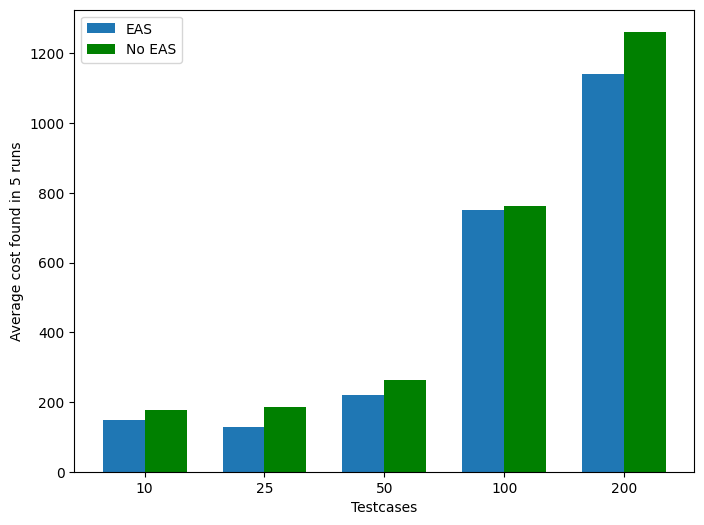

In [16]:
alg1 = best1
alg2 = best2
testcase_name=['10','25','50','100','200']
ind = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(ind - width / 2, alg1, width, color='#1f77b4')
rects2 = ax.bar(ind + width / 2, alg2, width, color='green')

plt.xticks(np.arange(5), testcase_name)
plt.xlabel('Testcases')
plt.ylabel('Average cost found in 5 runs')
plt.legend((rects1[0], rects2[0]), ('EAS', 'No EAS'))

plt.show()

In [4]:
def plotting_runtime(input_sizes,runtimes):
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.plot(input_sizes, runtimes)

    # Customize plot elements:
    plt.xlabel("Input Size (n)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Runtime Complexity Visualization")
    plt.grid(True)


    plt.show()
def plotting_convergence(iteration,convergence_test):
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.plot(iteration, convergence_test)

    # Customize plot elements:
    plt.xlabel("Iterations")
    plt.ylabel("Min cost")
    plt.title("Convergence Visualization")
    plt.grid(True)

    
    plt.show()

LS_SA runtime

In [5]:
input_sizes=[10,25,50,100]
values,runtimes={},{}

In [ ]:

values['LS-SA'],runtimes['LS-SA']=run(LS_LA_Solver,testcases)

print(values['LS-SA'])
print(runtimes['LS-SA'])


In [ ]:
plotting_runtime(input_sizes,runtimes['LS-SA'])

Ant Colony Runtime

In [27]:

values['ACO'],runtimes['ACO']=run(ACO_Solver,testcases)
print(values['ACO'])
print(runtimes['ACO'])


[148, 131, 231, 773]
[5.820104122161865, 11.865733861923218, 21.89160418510437, 72.66887068748474]


In [ ]:
plotting_runtime(input_sizes,runtimes['ACO'])

In [ ]:
Greedy Runtime

In [ ]:
values['Greedy'],runtimes['Greedy']=run(Greedy_Solver,testcases)
print(values['Greedy'])
print(runtimes['Greedy'])

[217, 172, 292, 783]
[0.000995635986328125, 0.0, 0.0, 0.0013175010681152344]


In [ ]:
plotting_runtime(input_sizes,runtimes['Greedy'])

CP

In [9]:
input_sizes_for_exact=[10,25,50]

In [6]:
values['CP'],runtimes['CP']=run(CP_Solver,testcases)
print(values['CP'])
print(runtimes['CP'])

[148.0, 121.0, 198.0]
[0.31995368003845215, 4.877676010131836, 23.145126819610596]


In [ ]:
plotting_runtime(input_sizes_for_exact,runtimes['CP'])

In [24]:
def load_data_from_json2():
    with open('testcase.json','r') as file:
        testcases=json.load(file)
    for i in testcases['testcase']['storage']:
        i.insert(0,0)
    return testcases['testcase']
#testcase=testcases['200s-test']
testcase=load_data_from_json2()

In [25]:

s1=LS_LA_Solver(testcase)
ans1,val1,convergence_test1=s1.solve()

In [28]:
s2=LS_LA_Solver2(testcase)
ans2,val2,convergence_test2=s2.solve()

In [26]:
print(convergence_test1)
print(len(convergence_test1))
print(min(convergence_test1))

[4957, 4953, 4953, 4969, 4976, 5012, 5002, 4996, 5005, 5030, 5041, 5064, 5056, 5048, 5077, 5065, 5079, 5054, 5054, 5067, 5067, 5062, 5062, 5052, 5057, 5047, 5050, 5048, 5048, 5044, 5044, 5037, 5037, 5047, 5047, 5053, 5057, 5078, 5078, 5068, 5087, 5086, 5086, 5098, 5084, 5084, 5085, 5080, 5080, 5080, 5074, 5060, 5060, 5060, 5051, 5048, 5040, 5050, 5050, 5050, 5047, 5047, 5047, 5038, 5038, 5038, 5038, 5038, 5038, 5037, 5037, 5030, 5022, 5022, 5022, 5022, 5022, 5022, 5022, 5022, 5022, 5022, 5018, 5018, 5018, 5018, 5018, 5015, 5015, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4995, 4995, 4995, 4985, 4985, 4985, 4979, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4976, 4976, 4976, 4976, 4976, 4976, 4976, 4976, 4976, 4976, 497

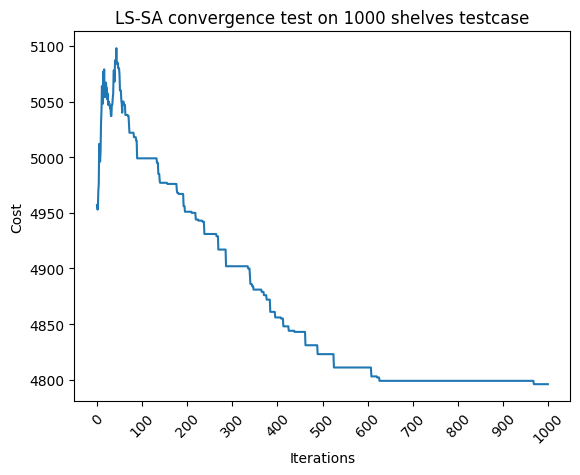

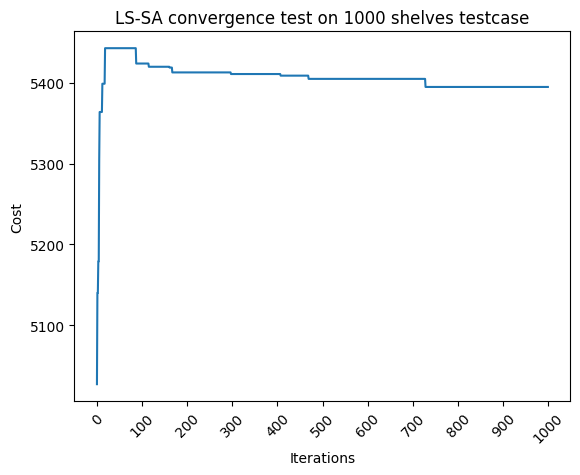

In [29]:
def show_conv_test(conv_test,n):
    x = range(n)
    y = conv_test[:n]
    fig, ax = plt.subplots()

    # Plot the data
    ax.plot(x, y)

    # Set major ticks at desired intervals (every 1000 points in this case)
    ax.set_xticks(range(0, n+1, n//10))

    # Set minor ticks at finer intervals for visual clarity (every 200 points)
    ax.set_xticks(range(0, n+1, n//10), minor=True)

    # Turn off minor tick labels
    ax.tick_params(which='minor', bottom=False)

    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('LS-SA convergence test on 1000 shelves testcase')

    # Optional: Rotate x-axis labels to prevent overlapping
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()
n=len(convergence_test1)
show_conv_test(convergence_test1,n)
show_conv_test(convergence_test2,n)